In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/Users/fengzhaohong/Desktop/loans_full_schema.csv")

In [3]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Initial Data Inspect

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

Miss data Inspect

In [5]:
miss = data.isnull().sum()
miss[miss>0]

emp_title                            833
emp_length                           817
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
months_since_last_delinq            5658
months_since_90d_late               7715
months_since_last_credit_inquiry    1271
num_accounts_120d_past_due           318
dtype: int64

In [6]:
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot 1 The Distribution of Annual Income Between Different Homeownerships

Exclude some extreme values to better visualize the data

In [8]:
upper_debt_to_income = np.quantile(data['annual_income'],0.95)
data1 = data[data['annual_income']<upper_debt_to_income]

Text(0.5, 1.0, 'Distribution of Annual Income Between Different Homeownerships')

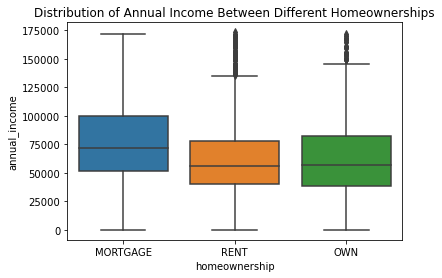

In [9]:
sns.boxplot(x='homeownership',y='annual_income',data=data1).set_title('Distribution of Annual Income Between Different Homeownerships')

As we see from the boxplot, people whose homeownership type is mortgage have an overall higher annual income compared to the other 2 types of homeownership.

Plot 2 The Distribution of Interest Rate Between Different Homeownerships

Text(0.5, 1.0, 'Distribution of Interest Rate Between Different Homeownerships')

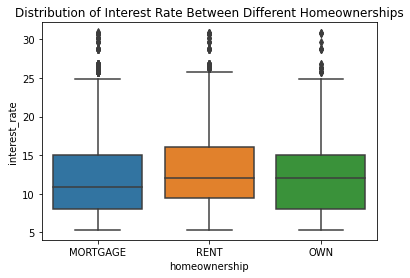

In [10]:
sns.boxplot(x='homeownership',y='interest_rate',data=data).set_title('Distribution of Interest Rate Between Different Homeownerships')

As the plot shows, mortgage has an overall relatively lower interest rate than other 2 types of homeownerships.

In [11]:
data1 = data1.sort_values('grade')

Plot 3 We also want to evaluate the annual income between different grades

Text(0.5, 1.0, 'Distribution of Annual Income Between Different Grades')

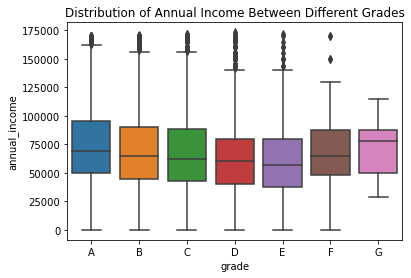

In [12]:
sns.boxplot(x='grade',y='annual_income',data=data1).set_title('Distribution of Annual Income Between Different Grades')

The plot shows that for people between grade A to E, the overall annual income decreases steadily. However, for grade F and G, people have higher annual income than other grades.

Plot 4 The Distribution of Annual Income Between Different Sub_grades

Text(0.5, 1.0, 'Distribution of Annual Income Between Different Sub_Grades')

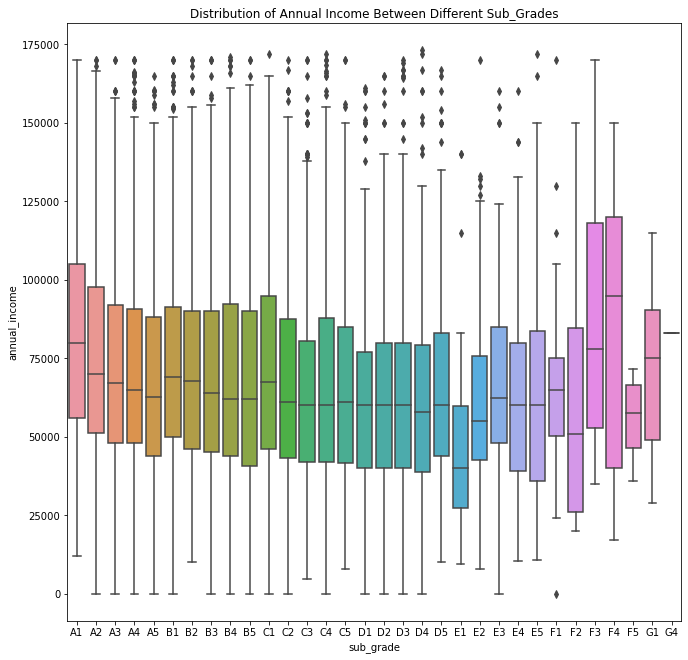

In [13]:
data1 = data1.sort_values('sub_grade')
fig, ax = plt.subplots(figsize=(11, 11))
sns.boxplot(x='sub_grade',y='annual_income',data=data1).set_title('Distribution of Annual Income Between Different Sub_Grades')

As we see, the annual income distribution pattern basically follows the one in plot 3.

Plot 5 Shows the interest rate for people in different sub grades

Text(0.5, 1.0, 'Distribution of Interest Rate Between Different Sub_Grades')

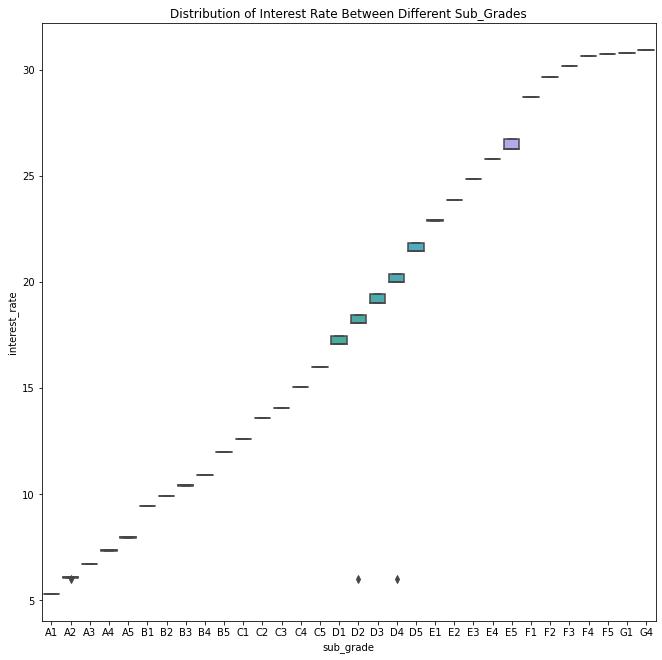

In [14]:
data1 = data1.sort_values('sub_grade')
fig, ax = plt.subplots(figsize=(11, 11))
sns.boxplot(x='sub_grade',y='interest_rate',data=data1).set_title('Distribution of Interest Rate Between Different Sub_Grades')

As we see, the lower grade a person holds, the higher interest rates he/she needs to pay.

Plot 6 We can also inspect the interest rates between different loan purposes

Text(0.5, 1.0, 'Distribution of Interest Rate Between Different Loan Purposes')

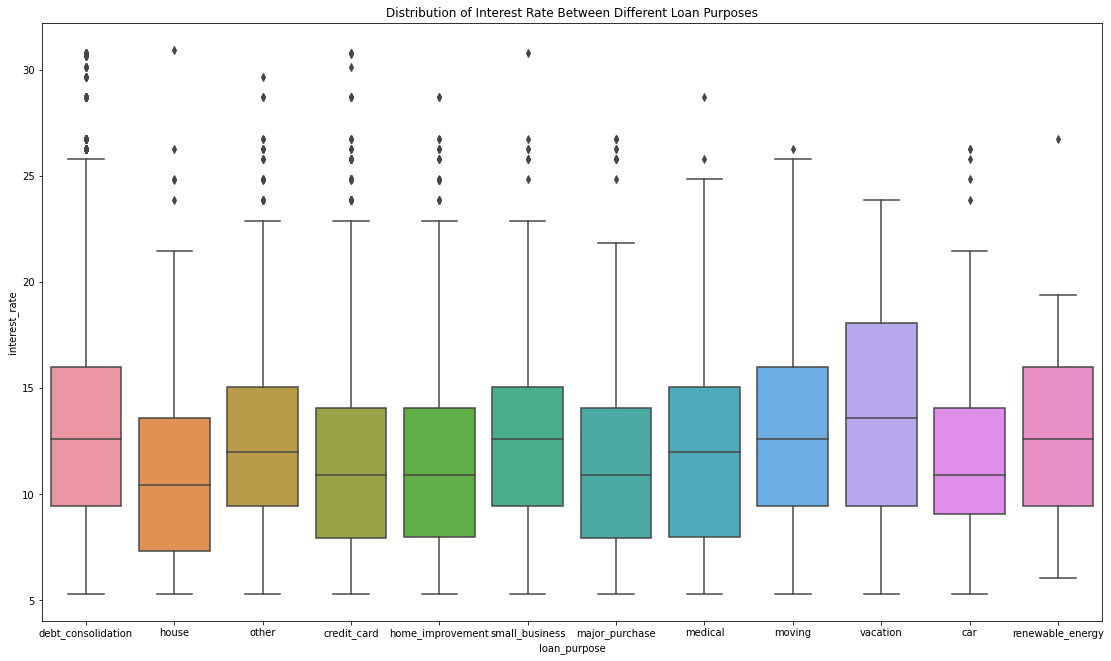

In [15]:
data = data.sort_values('loan_purpose')
fig, ax = plt.subplots(figsize=(19, 11))
sns.boxplot(x='loan_purpose',y='interest_rate',data=data1).set_title('Distribution of Interest Rate Between Different Loan Purposes')

It shows the loan purpose for vacation, small business, renewable energy, moving and debt consolidation would charge for higher interest rates

Plot 7 Using heatmap to explore the correlationships between variables

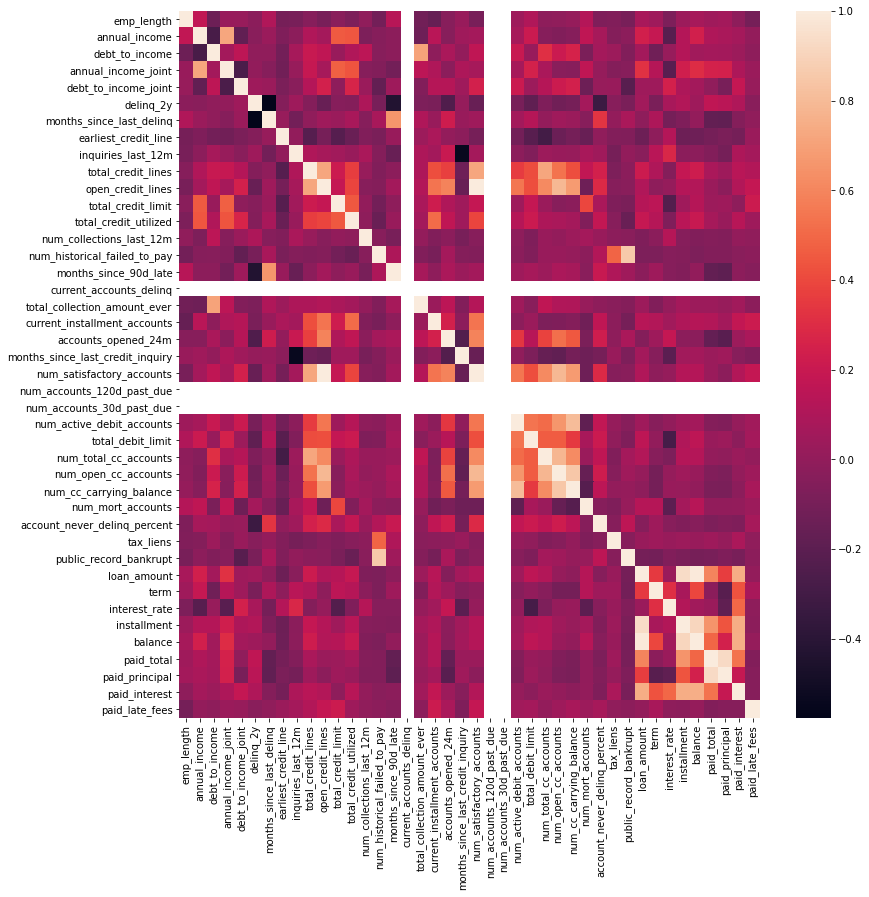

In [16]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(data.dropna(axis=0, how='any').corr(), ax=ax)
plt.show()

From this plot, when we are focusing on interest rate, we can initially knowing interest rate is negatively related with annual income, annual income joint, total credit limit, months since last credit inquiry, total debit limit, number of mortgage accounts and account never delinquent percent. And it is positive related with paid interest and term.

Inspect the correlation between interest rate and other variables

In [17]:
correlate = data1.corr()
corr_interest_rate = correlate.iloc[35,]
corr_interest_rate.sort_values(ascending=False)

interest_rate                       1.000000
paid_interest                       0.522652
term                                0.355937
debt_to_income_joint                0.260277
debt_to_income                      0.136421
inquiries_last_12m                  0.133352
installment                         0.124691
accounts_opened_24m                 0.123408
earliest_credit_line                0.096935
delinq_2y                           0.089288
balance                             0.088443
loan_amount                         0.086502
num_cc_carrying_balance             0.084596
paid_total                          0.073469
total_credit_utilized               0.056317
current_installment_accounts        0.050778
public_record_bankrupt              0.044632
num_historical_failed_to_pay        0.035781
num_collections_last_12m            0.032151
num_active_debit_accounts           0.028243
paid_late_fees                      0.022721
tax_liens                           0.016128
total_coll

Plot 8 Inspect the high correlation between paid interest and interest rate with scatter plot

Text(0, 0.5, 'Interest Rate')

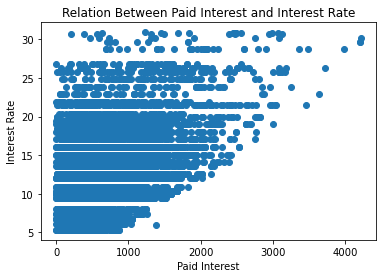

In [18]:
plt.scatter(x='paid_interest',y='interest_rate',data=data)
plt.title('Relation Between Paid Interest and Interest Rate')
plt.xlabel('Paid Interest')
plt.ylabel('Interest Rate')

Predict Models Building

In [ ]:
miss = data.isnull().sum()
miss[miss>0]

In [ ]:
data = data.fillna(0)

Process some of miss values 

In [32]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

Using H2O package to bulid RandomForest Model to predict interest rate

In [33]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "14.0.2" 2020-07-14; Java(TM) SE Runtime Environment (build 14.0.2+12-46); Java HotSpot(TM) 64-Bit Server VM (build 14.0.2+12-46, mixed mode, sharing)
  Starting server from /opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/vd/n_1qpypd1nx1tv5h10c4zt7m0000gn/T/tmp1dt1hp8c
  JVM stdout: /var/folders/vd/n_1qpypd1nx1tv5h10c4zt7m0000gn/T/tmp1dt1hp8c/h2o_fengzhaohong_started_from_python.out
  JVM stderr: /var/folders/vd/n_1qpypd1nx1tv5h10c4zt7m0000gn/T/tmp1dt1hp8c/h2o_fengzhaohong_started_from_python.err
  Server is running at http://127.0.0.1:54327
Connecting to H2O server at http://127.0.0.1:54327 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.7
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_fengzhaohong_9aftln
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [34]:
train_5 = data.iloc[data_train_index]
test_5 = data.drop(data_train_index)

In [35]:
h2odf_train=H2OFrame(train_5)
h2odf_test=H2OFrame(test_5)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
variables=['emp_length','annual_income','debt_to_income','annual_income_joint','debt_to_income_joint',
                'delinq_2y','months_since_last_delinq','earliest_credit_line','inquiries_last_12m','total_credit_lines',
                'open_credit_lines','total_credit_limit','total_credit_utilized','num_collections_last_12m','num_historical_failed_to_pay',
                'months_since_90d_late','current_accounts_delinq','total_collection_amount_ever','current_installment_accounts','accounts_opened_24m',
                'months_since_last_credit_inquiry','num_satisfactory_accounts','num_accounts_30d_past_due','num_active_debit_accounts','total_debit_limit',
                'public_record_bankrupt','loan_amount','term','installment','balance','paid_total','paid_principal',
                'paid_interest','paid_late_fees']
target='interest_rate'

In [38]:
model=H2ORandomForestEstimator(balance_classes=True, ntrees=400, max_depth=40,
                                       mtries=-1, seed=42, score_each_iteration=True)
model.train(x=variables,y=target,training_frame=h2odf_train,validation_frame=h2odf_test)
p=model.r2()

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [39]:
p

0.8870208348199706

The importance of different predict features in the model. 

<AxesSubplot:xlabel='scaled_importance', ylabel='variable'>

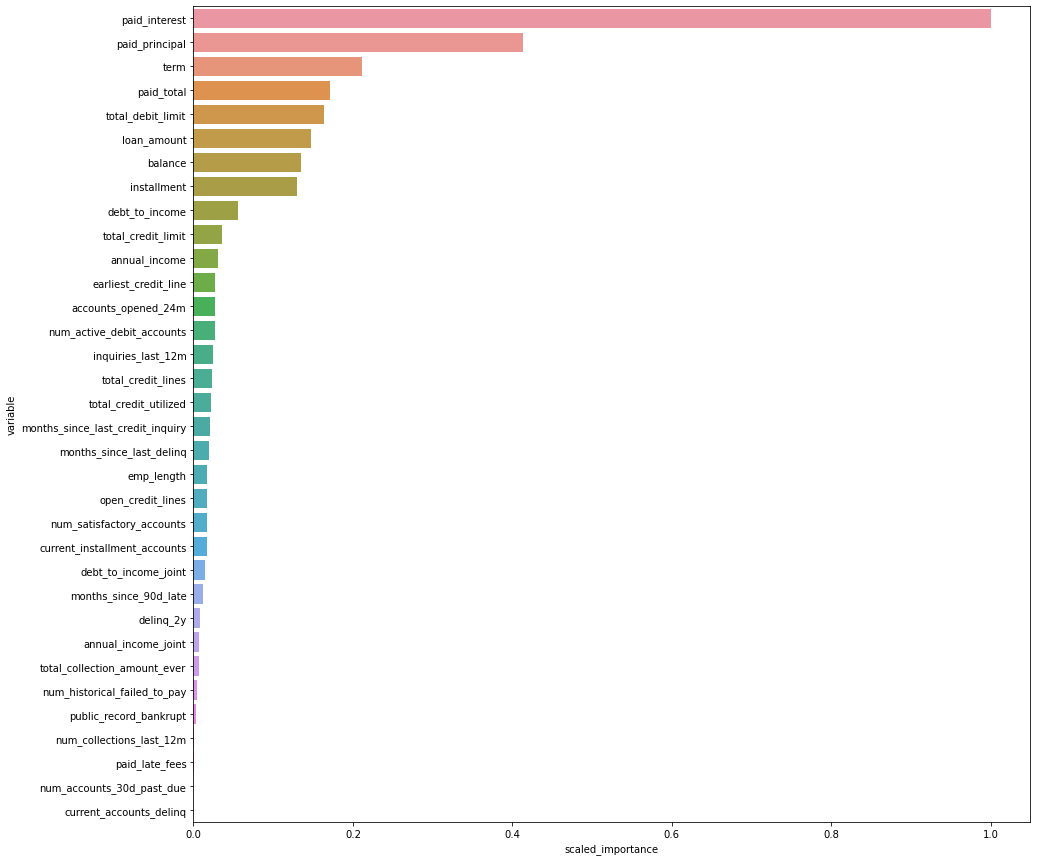

In [43]:
importance=model.varimp(use_pandas=True)
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='scaled_importance',y='variable',data=importance)

We can see paid interest, paid principal, term, paid total, total debit limit are relative important variables for interest rate predicting.

Select top 10 important variables to rebuild the model.

In [71]:
variables1=['paid_interest','paid_principal','term','paid_total','total_debit_limit','loan_amount',
                'balance','installment','debt_to_income','total_credit_limit']
target1='interest_rate'

In [72]:
model2=H2ORandomForestEstimator(balance_classes=True, ntrees=400, max_depth=40,
                                       mtries=-1, seed=42, score_each_iteration=True)
model2.train(x=variables1,y=target1,training_frame=h2odf_train,validation_frame=h2odf_test)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [75]:
p_test=model2.r2(valid=True)

In [76]:
p_test

0.9700450667588197

The R squared of the model for test dataset is 0.97.

<AxesSubplot:xlabel='scaled_importance', ylabel='variable'>

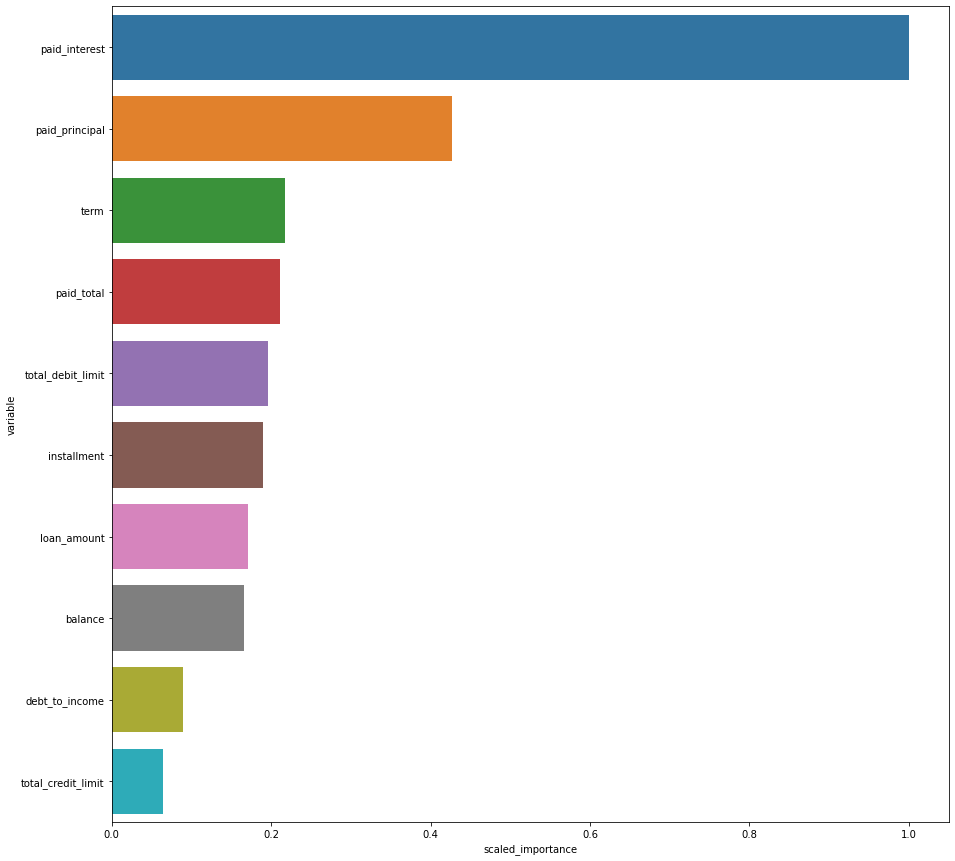

In [77]:
importance=model2.varimp(use_pandas=True)
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='scaled_importance',y='variable',data=importance)

We can also inspect the importance of different variables for predicting interest rate in this model.

2 nd Model would apply multi-linear regression

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

Based on Random Forest Regression, develop a regression model with variables that are important.

In [86]:
np.random.seed(12)
data_train_index=data.sample(frac=0.75).index

In [87]:
train_y = data['interest_rate'].iloc[data_train_index]
train_x = data[['paid_interest','paid_principal','term','paid_total','total_debit_limit','loan_amount',
                'balance','installment','debt_to_income','total_credit_limit',
                'annual_income']].iloc[data_train_index]

In [88]:
regression1 = sm.OLS(train_y,sm.add_constant(train_x))

In [89]:
regression1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:10:11   Log-Likelihood:                -18875.
No. Observations:                7500   AIC:                         3.777e+04
Df Residuals:                    7488   BIC:                         3.786e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0141      0.270     -7.455      0.000      -2.544      -1.484
paid_interest         -0.0285      0.019     -1.513      0.130      -0.065       0.008
paid_principal        -0.0339      0.019     -1.802      0.072      -0.071       0.003
term                   0.3484      0.006     54.272      0.000       0.336       0.361
paid_total             0.0339      0.019      1.802      0.072      -0.003       0.071
total_debit_limit  -2.291e-05   1.52e-06    -15.087      0.000   -2.59e-05   -1.99e-05
loan_amount           -0.0011   9.77e-05    -11.141      0.000      -0.001      -0.001
balance            -7.225e-05   9.56e-05     -0.756      0.450      -0.000       0.000
installment            0.0320      0.001     49.039      0.000       0.031       0.033
debt_to_income         0.0230      0.003      8.818      0.000       0.018       0.028
total_credit_limit -8.436e-07   2.37e-07     -3.557      0.000   -1.31e-06   -3.79e-07
annual_income       2.605e-07   6.66e-07      0.391      0.696   -1.05e-06    1.57e-06
==============================================================================
Omnibus:                     1128.660   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.887
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop the variables which are not statistically significant one by one.

In [90]:
train_x_2 = train_x.drop('annual_income',axis=1)
regression2 = sm.OLS(train_y,sm.add_constant(train_x_2))
regression2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1359.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:10:20   Log-Likelihood:                -18875.
No. Observations:                7500   AIC:                         3.777e+04
Df Residuals:                    7489   BIC:                         3.785e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9979      0.267     -7.484      0.000      -2.521      -1.475
paid_interest         -0.0286      0.019     -1.516      0.130      -0.065       0.008
paid_principal        -0.0340      0.019     -1.804      0.071      -0.071       0.003
term                   0.3483      0.006     54.308      0.000       0.336       0.361
paid_total             0.0340      0.019      1.805      0.071      -0.003       0.071
total_debit_limit  -2.286e-05   1.51e-06    -15.125      0.000   -2.58e-05   -1.99e-05
loan_amount           -0.0011   9.77e-05    -11.143      0.000      -0.001      -0.001
balance            -7.193e-05   9.56e-05     -0.752      0.452      -0.000       0.000
installment            0.0320      0.001     49.048      0.000       0.031       0.033
debt_to_income         0.0227      0.003      9.058      0.000       0.018       0.028
total_credit_limit -8.043e-07   2.15e-07     -3.743      0.000   -1.23e-06   -3.83e-07
==============================================================================
Omnibus:                     1128.827   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1993.170
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
train_x_3 = train_x_2.drop('balance',axis=1)
regression3 = sm.OLS(train_y,sm.add_constant(train_x_3))
regression3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1510.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:10:20   Log-Likelihood:                -18875.
No. Observations:                7500   AIC:                         3.777e+04
Df Residuals:                    7490   BIC:                         3.784e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0015      0.267     -7.499      0.000      -2.525      -1.478
paid_interest         -0.0285      0.019     -1.516      0.130      -0.065       0.008
paid_principal        -0.0339      0.019     -1.800      0.072      -0.071       0.003
term                   0.3484      0.006     54.333      0.000       0.336       0.361
paid_total             0.0340      0.019      1.805      0.071      -0.003       0.071
total_debit_limit  -2.284e-05   1.51e-06    -15.117      0.000   -2.58e-05   -1.99e-05
loan_amount           -0.0012   1.85e-05    -62.716      0.000      -0.001      -0.001
installment            0.0320      0.001     49.078      0.000       0.031       0.033
debt_to_income         0.0227      0.003      9.064      0.000       0.018       0.028
total_credit_limit  -8.03e-07   2.15e-07     -3.737      0.000   -1.22e-06   -3.82e-07
==============================================================================
Omnibus:                     1127.784   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1990.338
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       4.598   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
train_x_4 = train_x_3.drop('paid_interest',axis=1)
regression4 = sm.OLS(train_y,sm.add_constant(train_x_4))
regression4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1698.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:10:20   Log-Likelihood:                -18876.
No. Observations:                7500   AIC:                         3.777e+04
Df Residuals:                    7491   BIC:                         3.783e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9945      0.267     -7.473      0.000      -2.518      -1.471
paid_principal        -0.0054      0.000    -45.487      0.000      -0.006      -0.005
term                   0.3484      0.006     54.321      0.000       0.336       0.361
paid_total             0.0054      0.000     45.631      0.000       0.005       0.006
total_debit_limit  -2.286e-05   1.51e-06    -15.132      0.000   -2.58e-05   -1.99e-05
loan_amount           -0.0012   1.85e-05    -62.693      0.000      -0.001      -0.001
installment            0.0320      0.001     49.053      0.000       0.031       0.033
debt_to_income         0.0226      0.003      9.044      0.000       0.018       0.028
total_credit_limit -8.078e-07   2.15e-07     -3.760      0.000   -1.23e-06   -3.87e-07
==============================================================================
Omnibus:                     1127.609   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1989.358
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       4.597   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the predict variables are statistically significant.

Based on the model, we can see holding other variables unchanged, for 1 unit increase in paid principal, the interest rate will decrease -0.0054, while 1 unit increase of term, the interest rate will increase 0.3484, 1 unit increase of paid total, the interest rate will 0.0054, 1 unit increase of loan amount, the interest rate will decrease 0.0012, 1 unit increase of installment will increase interest rate for 0.032, 1 unit increase in debt to income ratio will increase interest rate for 0.0226. 

In [93]:
test_y = data['interest_rate'].drop(data_train_index)
test_x = data[['paid_principal','term','paid_total','total_debit_limit','loan_amount',
              'installment','debt_to_income','total_credit_limit']].drop(data_train_index)

In [94]:
regression4_test_r2 = r2_score(regression4.fit().predict(sm.add_constant(test_x)),test_y)

In [95]:
regression4_test_r2

0.4984098629766178

The model has 0.499 R squared score for the test dataset.

For model enhancements, it maybe helpful to try some combinations of different "ntrees" and "max_depth" to better optimize the parameters of the randomforest regression model. It is also worth to transfer the categorical variables into dummy variables and apply into the linear regression models, to discover whether they are helpful to increase the model prediction accuracy. 

For future investigation, I propose that we can record people’s historical loan records over the time. Based on the change of a person’s interest rate overtime, we may can create a time series model, to predict his/her interest rate changes in the future. Combining with the changes of other variables (such as paid interest, paid principal, paid total) overtime, we may can discover a clearer picture of the relationship between these variables and better foresee a person’s loaning behavior.